In [1]:
'''
***** STUDENT PERFORMANCE DATASET *****
a)Load the ‘Student Performance’ dataset into one of the data structures (NumPy or Pandas).
b)Display description of the loaded dataset.
c)Display the first 15 rows 
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

perf_df=pd.read_csv('studentperformance.csv')



print('====Understanding Info()====')
perf_df.info()#To get a quick overview of the dataset(how many rows, attributes, data type)

print('\n====Understanding Info() Short Summary====')
perf_df.info(verbose=False) #Gives short summary. Useful when the #of attributes is large 



print('\n====Understanding describe()====')
#Used to view basic statistical details like percentile, mean, std dev etc.of a data frame 
#or a series of numeric values.
perf_df.describe()

#NOTE: There should not be a 'print' or 'head' statement after 'describe'. It wont give output

#print('\n====Understanding head()====')
#perf_df.head(15)


====Understanding Info()====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    774 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
mathscore                      1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

====Understanding Info() Short Summary====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 8 entries, gender to writing score
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

====Understanding describe()====


,mathscore,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [3]:
'''
c) Remove unnecessary features (E.g. drop unwanted columns) from the dataset such as 
‘lunch’ and ‘test preparation course’ .
'''
perf_dfCopy = perf_df.drop(['lunch', 'test preparation course'], axis=1,inplace = False)
print('\n====Understanding Inplace False : The Copied Dataframe====')
perf_dfCopy.head(3)




====Understanding Inplace False : The Copied Dataframe====


,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93


In [4]:
print('\n====Understanding Inplace True and False====')
perf_df.head(5)


====Understanding Inplace True and False====


,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [5]:
'''
d) Manipulate data by replacing empty column values in ‘parental level of education’ with a default value.
'''

perf_dfCopy["parental level of education"] = perf_df["parental level of education"].fillna("Not applicable")
print(perf_dfCopy.head(5))

   gender race/ethnicity parental level of education  mathscore  \
0  female        group B           bachelor's degree         72   
1  female        group C              Not applicable         69   
2  female        group B             master's degree         90   
3    male        group A          associate's degree         47   
4    male        group C              Not applicable         76   

   reading score  writing score  
0             72             74  
1             90             88  
2             95             93  
3             57             44  
4             78             75  


In [28]:
'''
e) Convert the attribute ‘race/ethnicity’ to have ‘groupA’ to be ‘Asian Students’, ‘groupB’ to be ‘African Students’ ,  ‘groupC’ to be ‘Afro-Asian Students’, ‘groupD’ to be ‘American Students’ and ‘groupE’ to be ‘European Students’.
'''
perf_df["race/ethnicity"]=perf_df["race/ethnicity"].map({
    "group A" : "Asian students",
    "group B" : "African students",
    "group C" : "Afro-Asian students",
    "group D" : "American students",
    "group E" : "European students"
})
#print(perf_df.head(10))
perf_df = perf_df.rename(columns={'reading score':'readingscore','writing score':'writingscore'},inplace=False)
print(perf_df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female            NaN           bachelor's degree      standard   
1  female            NaN                         NaN      standard   
2  female            NaN             master's degree      standard   
3    male            NaN          associate's degree  free/reduced   
4    male            NaN                         NaN      standard   

  test preparation course  mathscore  readingscore  writingscore   Marks_cats  
0                    none         72            72            74  Distinction  
1               completed         69            90            88  Distinction  
2                    none         90            95            93          NaN  
3                    none         47            57            44    2nd class  
4                    none         76            78            75          NaN  


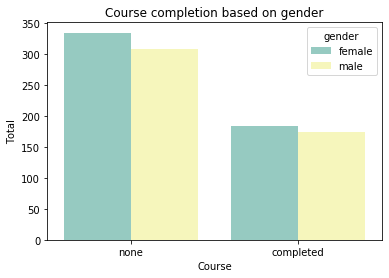

In [7]:
'''Perform the following visualizations on the loaded dataset:
       i)   Tally of the Number of Male & Female students who took up the ‘test 
             preparation course’ and those who did not. 
'''
ax = sns.countplot(x="test preparation course",hue='gender',palette='Set3',data=perf_df)
ax.set(title="Course completion based on gender", xlabel='Course', ylabel='Total')
plt.show() 

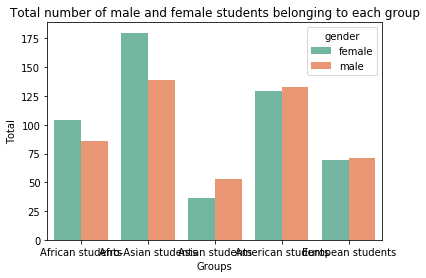

In [8]:
 '''
    ii)  Total Number of Male & Female Students belonging to each student group 
'''
ax = sns.countplot(x="race/ethnicity",hue="gender",palette="Set2",data=perf_df)
ax.set(title="Total number of male and female students belonging to each group", xlabel="Groups", ylabel="Total")
plt.show()

In [11]:
'''
iii) No of students who ‘failed’(less than 40), ‘second class’(between 40 & 50).  
         ‘first class’(between 60 & 75) and ‘distinction’(above 75) in ‘Maths’, 
         ‘Reading’ and ‘Writing’. 
'''
interval=(0,40,50,60,75)
categories = ["Fail", "2nd class","1st class","Distinction"]

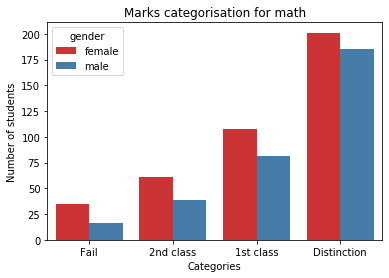

In [16]:
perf_df["Marks_cats"]=pd.cut(perf_df.mathscore,interval,labels=categories)
ax=sns.countplot(x="Marks_cats",hue="gender",palette="Set1",data=perf_df)
ax.set(title="Marks categorisation for math",xlabel="Categories",ylabel="Number of students")
plt.show()

In [13]:
perf_df["Marks_Cats"]=pd.cut(perf_df.readingscore,interval,labels=categories)
ax=sns.countplot(x="Marks_Cats",hue="gender",palette="Set1",data=perf_df)
ax.set(title="Marks categorisation for reading",xlabel="Categories",ylabel="Number of students")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'readingscore'

In [14]:
perf_df["Marks_Cats"]=pd.cut(perf_df.writingscore,interval,labels=categories)
ax=sns.countplot(x="Marks_Cats",hue="gender",palette="Set3",data=perf_df)
ax.set(title="Marks categorisation for Writing",xlabel="Categories",ylabel="Number of students")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'writingscore'